# Some stats about episode lengths

#####################################################

Split:  train
Number of episodes with a number of actions less or equal to 21: 6
Number of episodes with a number of actions less or equal to 31: 342
Number of episodes with a number of actions less or equal to 41: 2047
Number of episodes with a number of actions less or equal to 51: 4445
Number of episodes with a number of actions less or equal to 61: 6760
Number of episodes with a number of actions less or equal to 71: 8469
Number of episodes with a number of actions less or equal to 81: 9570
Number of episodes with a number of actions less or equal to 91: 10230
Number of episodes with a number of actions less or equal to 101: 10548
Number of episodes with a number of actions less or equal to 111: 10702
Number of episodes with a number of actions less or equal to 121: 10750
Number of episodes with a number of actions less or equal to 131: 10774
Number of episodes with a number of actions less or equal to 141: 10786
Number of epis

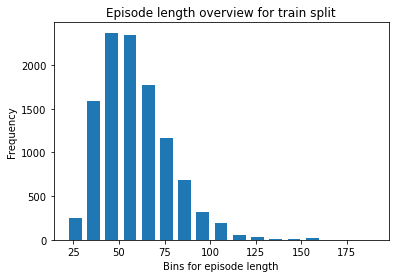

#####################################################

Split:  val_seen
Number of episodes with a number of actions less or equal to 24: 3
Number of episodes with a number of actions less or equal to 34: 45
Number of episodes with a number of actions less or equal to 44: 183
Number of episodes with a number of actions less or equal to 54: 351
Number of episodes with a number of actions less or equal to 64: 484
Number of episodes with a number of actions less or equal to 74: 613
Number of episodes with a number of actions less or equal to 84: 700
Number of episodes with a number of actions less or equal to 94: 757
Number of episodes with a number of actions less or equal to 104: 775
Number of episodes with a number of actions less or equal to 114: 778
Coverage with only 90 steps-episode: 727 episodes, 93.44473007712082%


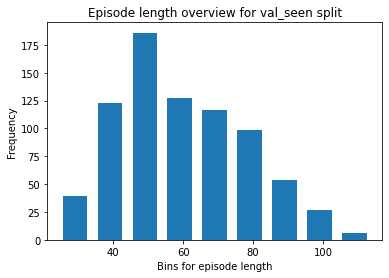

#####################################################

Split:  val_unseen
Number of episodes with a number of actions less or equal to 26: 3
Number of episodes with a number of actions less or equal to 36: 120
Number of episodes with a number of actions less or equal to 46: 444
Number of episodes with a number of actions less or equal to 56: 987
Number of episodes with a number of actions less or equal to 66: 1398
Number of episodes with a number of actions less or equal to 76: 1662
Number of episodes with a number of actions less or equal to 86: 1746
Number of episodes with a number of actions less or equal to 96: 1797
Number of episodes with a number of actions less or equal to 106: 1827
Number of episodes with a number of actions less or equal to 116: 1830
Number of episodes with a number of actions less or equal to 126: 1836
Number of episodes with a number of actions less or equal to 136: 1839
Coverage with only 90 steps-episode: 1761 episodes, 95.75856443719412%


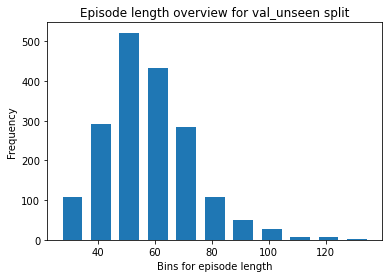

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import json
import gzip
# if using a Jupyter notebook, includue:
%matplotlib inline

def read_compressed_json_file(path):
    with gzip.open(path, "rb") as f:
        file = json.loads(f.read().decode("ascii"))
    return file


splits = ["train", "val_seen", "val_unseen"]

for split in splits:
    print("#####################################################\n")
    print("Split: ", split)
    file = f"../data/datasets/R2R_VLNCE_v1-3_preprocessed/{split}/{split}_gt.json.gz"
    annotation = read_compressed_json_file(file)
    keys = annotation.keys()
    episode_lengths = [ len(annotation[key]['actions']) for key in keys]
    

        
    bin_width = 10
    bins_list = range(min(episode_lengths), max(episode_lengths) + bin_width, bin_width)
    filter_episode = lambda size: len(list(filter(lambda x: x <= size , episode_lengths))) 
    for bins in bins_list:
        #[len(list(filter(lambda x: x <= bins , length))) for length in episode_lengths])
        print( f"Number of episodes with a number of actions less or equal to {bins}:" , filter_episode(bins))
    
    less_equal_90 = filter_episode(90)
    coverage = less_equal_90/len(episode_lengths)
    print(f"Coverage with only 90 steps-episode: {less_equal_90} episodes, {coverage*100}%")
    
    plt.figure()
    plt.xlabel("Bins for episode length")
    plt.ylabel("Frequency")
    plt.hist(episode_lengths, bins=bins_list,  rwidth=0.7)
    plt.title(f"Episode length overview for {split} split")
    plt.show()